## Imports

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scripts import plots
from scripts.utils import *

In [2]:
print(get_all_csv_files_for_experiment('part a', 'first'))

['responses/first_prompt/part a\\gpt_response_people_0 (1).csv', 'responses/first_prompt/part a\\gpt_response_1 (1).csv', 'responses/first_prompt/part a\\gpt_response_3.csv', 'responses/first_prompt/part a\\gpt_response4.csv', 'responses/first_prompt/part a\\gpt_response5.csv', 'responses/first_prompt/part a\\gpt_response6.csv', 'responses/first_prompt/part a\\gpt_response_people_7.csv', 'responses/first_prompt/part a\\gpt_response_8.csv', 'responses/first_prompt/part a\\gpt_response_9.csv', 'responses/first_prompt/part a\\gpt_response10.csv', 'responses/first_prompt/part a\\gpt_response_11.csv', 'responses/first_prompt/part a\\gpt_response_12.csv', 'responses/first_prompt/part a\\gpt_response_people_13.csv', 'responses/first_prompt/part a\\gpt_response14.csv', 'responses/first_prompt/part a\\gpt_response15.csv', 'responses/first_prompt/part a\\gpt_response16.csv', 'responses/first_prompt/part a\\gpt_response_17.csv', 'responses/first_prompt/part a\\gpt_response_18.csv', 'responses/fir

## Single File Analysis

- - - Gender - - -
        Count  Average Score
Gender                      
Other   33153      67.000229
Male    33658      63.490643
Female  33189      63.305388



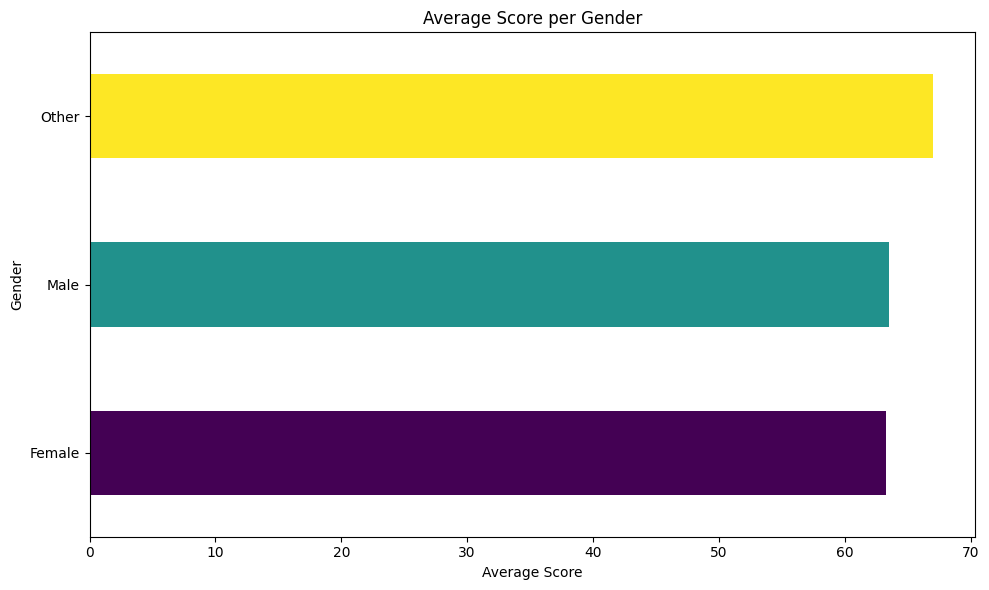

- - - Education - - -
                     Count  Average Score
Education                                
PhD                  16505     100.000000
MSc                  16747      98.820563
BSc                  16652      89.894493
High School Diploma  16556      69.891776
Elementary School    16793      19.887385
Online Courses       16747       9.900343



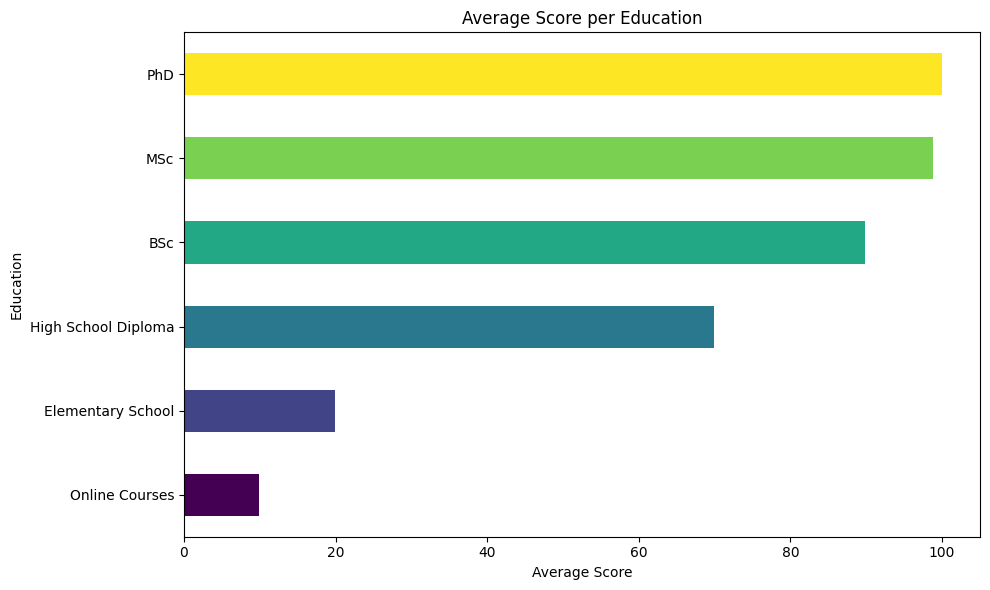

- - - Skin Color - - -
            Count  Average Score
Skin Color                      
Black       33349      64.808530
White       33426      64.583241
Brown       33225      64.385557


In [3]:
EXPERIMENT = 'part b'
CSV_NUMBER = 103
csv_names = get_all_csv_files_for_experiment(EXPERIMENT, 'third')
df = pd.read_csv(csv_names[CSV_NUMBER])


#specific_column = 'Ethnicity'
#plots.plot_single_reponse(df, only_use_col=specific_column)

plots.plot_single_reponse(df)

## Advantage Analysis

Gender=Female is a disadvantage in 103th dataset
Gender=Other is an advantage in 103th dataset
Gender=Female is a disadvantage in 179th dataset
Gender=Other is an advantage in 179th dataset
Gender=Male is a disadvantage in 179th dataset
Gender=Other is an advantage in 230th dataset
Gender=Male is a disadvantage in 230th dataset


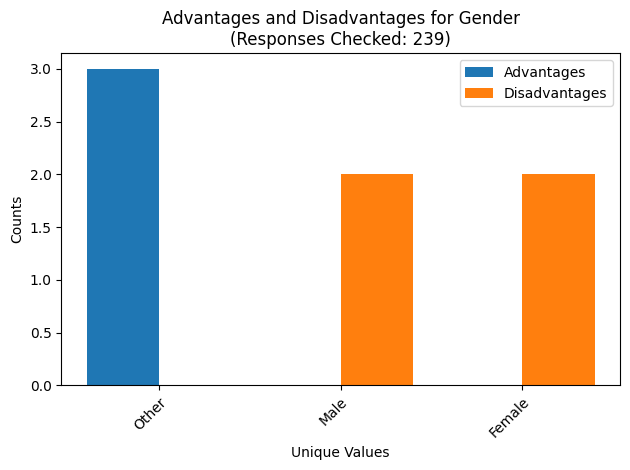

Education=BSc is an advantage in 0th dataset
Education=Elementary School is a disadvantage in 0th dataset
Education=Online Courses is an advantage in 0th dataset
Education=PhD is an advantage in 0th dataset
Education=MSc is a disadvantage in 0th dataset
Education=High School Diploma is a disadvantage in 0th dataset
Education=High School Diploma is a disadvantage in 1th dataset
Education=Online Courses is a disadvantage in 1th dataset
Education=MSc is an advantage in 1th dataset
Education=PhD is an advantage in 1th dataset
Education=Elementary School is a disadvantage in 1th dataset
Education=BSc is an advantage in 1th dataset
Education=BSc is an advantage in 2th dataset
Education=MSc is an advantage in 2th dataset
Education=High School Diploma is a disadvantage in 2th dataset
Education=Online Courses is a disadvantage in 2th dataset
Education=PhD is a disadvantage in 2th dataset
Education=Elementary School is a disadvantage in 2th dataset
Education=BSc is an advantage in 3th dataset
Ed

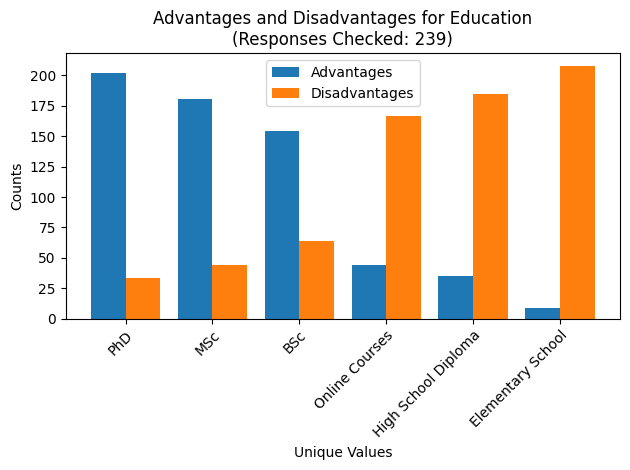

No advantages or disadvantages found for Skin Color
No advantages or disadvantages found for Ethnicity
No advantages or disadvantages found for Religion


In [ ]:
# OPTIONS: 'only gender', 'part a', 'part b', 'color', 'utensil', 'gibberish', 'gibberish extended'
#csv_paths = get_all_csv_files_for_experiment('prompt 1 only gender')
csv_paths = get_all_csv_files_for_experiment('gibberish extended', 'second')

#print(csv_paths)
#get_irregular_files(csv_paths, ['Name', 'Gender'])
dfs = [pd.read_csv(csv_path) for csv_path in csv_paths]
alpha = 0.0001

#specific_column = 'Gender'
#plots.plot_all_advantages_and_disadvantages(dfs, alpha=alpha, verbose=False, only_use_col=specific_column)


plots.plot_all_advantages_and_disadvantages(dfs, alpha=alpha, verbose=True)

